<h1 align="center">Clustering</h1><br>
Clustering is the task of dividing the population or data points into a number of groups (Clusters) such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

<img src="images/Clustering example.jpg">

#### `Import needed libraries`

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Simple example

#### `Gather the data`

In [304]:
df = pd.read_csv('data/Country clusters.csv')

In [305]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


> The Latitude and Longitude corresponde to the geographic centers of the countary converted to decemal degrees (West and South are negative)

#### `Plot the data`

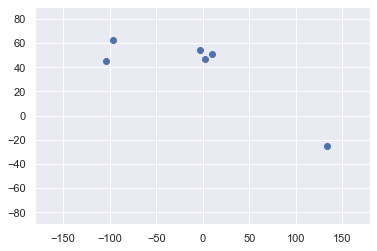

In [306]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

#### `Features selection`

In [307]:
# work with Latitude and Longitude
x = df.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


#### `Clustering`

### 1) KMeans: <br>

K means is an iterative clustering algorithm that aims to find local maxima in each iteration. This algorithm works in these 5 steps :
- Specify the desired number of clusters K.
- Randomly assign each data point to a cluster.
- Compute cluster centroids.
- Re-assign each point to the closest cluster centroid.
- Re-compute cluster centroids.

**We need to achieve:**
- Minimum distance between points in a cluster.
- Maximum distance between clusters (Centroids).

In [308]:
from sklearn.cluster import KMeans

# select number of clusters using ELBOW method
WCSS = []
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

C:\Users\Alaa Sedeeq\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


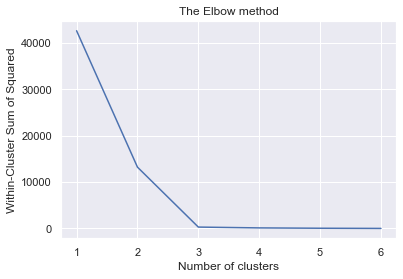

In [309]:
plt.plot(range(1, 7), WCSS)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squared');

In [310]:
# so we use k=3
kmeans = KMeans(3).fit(x)

#### `Plot the results`

In [311]:
clusters = df.copy().assign(cluster=kmeans.predict(x))

In [312]:
clusters

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


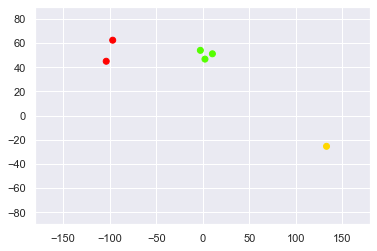

In [313]:
plt.scatter(clusters['Longitude'], clusters['Latitude'], c=clusters['cluster'], cmap='prism')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

### Pros and Cons
<table align='left'>
    <tr>
        <td><b>Pros</b></td>
        <td><b>Cons</b></td>
    </tr>
    <tr>
        <td>Simple to understand</td>
        <td>Need to identify K(use elbow)</td>
    </tr>
    <tr>
        <td>Fast to Cluster</td>
        <td>Sensitive to initialization(use KMeans++)</td>
    </tr>
    <tr>
        <td>Easy to implement</td>
        <td>Sensitive to outliers(remove outliers first)</td>
    </tr>
    <tr>
        <td>Always yields a results</td>
        <td>Produces spherical solutions(due to the used euclidean distance)</td>
    </tr>
</table>

### Market Segmentation

In [314]:
df = pd.read_csv('data/Market.csv')
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


> <b> Satisfaction</b> is  descreate values (1-10).<br>
> <b>Loyalty</b> is measured using purchases for 1y and other factors. (-2.5-2.5)

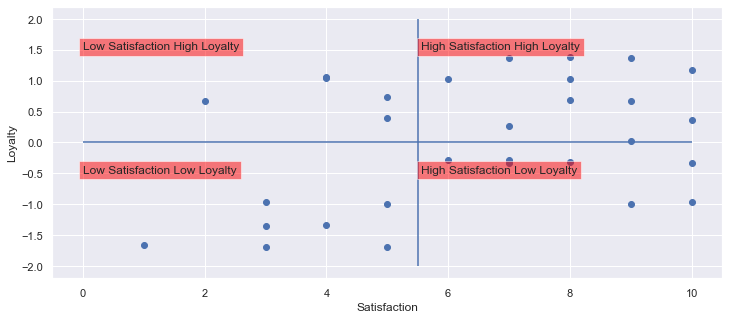

In [315]:
plt.figure(figsize=(12, 5))
plt.scatter(df['Satisfaction'], df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.vlines(5.5, -2, 2)
plt.hlines(0, 0, 10)
bbox=dict(facecolor='red', alpha=0.5)
plt.text(0, -0.5, 'Low Satisfaction Low Loyalty', bbox=bbox)
plt.text(0, 1.5, 'Low Satisfaction High Loyalty', bbox=bbox)
plt.text(5.55, 1.5, 'High Satisfaction High Loyalty', bbox=bbox)
plt.text(5.55, -0.5, 'High Satisfaction Low Loyalty', bbox=bbox);

> #### We need to standardize the values first

In [316]:
from sklearn.preprocessing import scale

x_scaled = scale(df)

In [317]:
# select number of clusters using ELBOW method
WCSS = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    WCSS.append(kmeans.inertia_)

C:\Users\Alaa Sedeeq\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


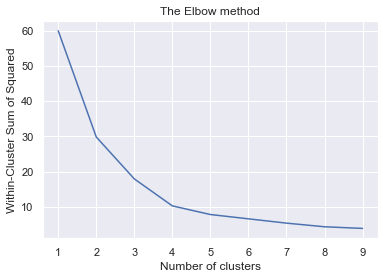

In [318]:
plt.plot(range(1, 10), WCSS)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squared');

In [319]:
kmeans = KMeans(4)
kmeans.fit(x_scaled)

df['Clusters'] = kmeans.predict(x_scaled)

df.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2


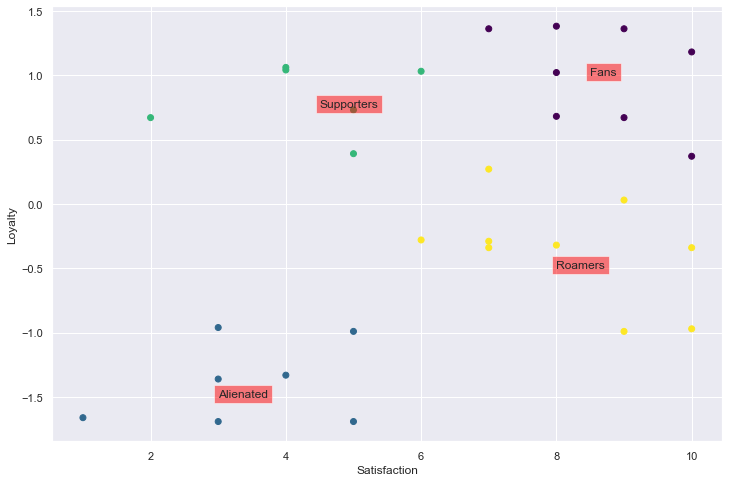

In [320]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Satisfaction'], df['Loyalty'], c=df['Clusters'], cmap='viridis')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

bbox=dict(facecolor='red', alpha=0.5)
plt.text(3, -1.5, 'Alienated', bbox=bbox)
plt.text(4.5, 0.75, 'Supporters', bbox=bbox)
plt.text(8.5, 1, 'Fans', bbox=bbox)
plt.text(8, -0.5, 'Roamers', bbox=bbox);

### US SuperStore example

In [372]:
df = pd.read_excel('data/US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [374]:
df[['Sales','Discount','Profit','Quantity']].describe()

,Sales,Discount,Profit,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574
std,623.245101,0.206452,234.260108,2.225110
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.728750,2.000000
50%,54.490000,0.200000,8.666500,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


#### Preprocessing the Data

In [375]:
# category data encoding
df_k = df[['Ship Mode','Quantity','Sales','Profit','Sub-Category','Category','Region']].copy()

#Sub-Category column
sub_cat = df_k['Sub-Category'].astype('category')
sub_cat_dict = dict(enumerate(sub_cat.cat.categories))

#Category column
category_cat = df_k['Category'].astype('category')
cat_dict = dict(enumerate(category_cat.cat.categories))

#Region column
region_cat = df_k['Region'].astype('category')
region_dict = dict(enumerate(region_cat.cat.categories))

# Ship Mode Column 
ship_cat = df_k['Ship Mode'].astype('category')
ship_dict = dict(enumerate(ship_cat.cat.categories))

print('Sub-Category :', sub_Cat_dict, '\n\n', 'Category :', cat_dict, '\n\n',
      'Region :', region_dict, '\n\n', 'Ship Mode :', ship_dict)

Sub-Category : {0: 'Accessories', 1: 'Appliances', 2: 'Art', 3: 'Binders', 4: 'Bookcases', 5: 'Chairs', 6: 'Copiers', 7: 'Envelopes', 8: 'Fasteners', 9: 'Furnishings', 10: 'Labels', 11: 'Machines', 12: 'Paper', 13: 'Phones', 14: 'Storage', 15: 'Supplies', 16: 'Tables'} 

 Category : {0: 'Furniture', 1: 'Office Supplies', 2: 'Technology'} 

 Region : {0: 'Central', 1: 'East', 2: 'South', 3: 'West'} 

 Ship Mode : {0: 'First Class', 1: 'Same Day', 2: 'Second Class', 3: 'Standard Class'}


In [376]:
# reverse the dictionaries for mapping  
sub_map = {v: k for k, v in sub_cat_dict.items()}
cat_map = {v: k for k, v in cat_dict.items()}
region_map = {v: k for k, v in region_dict.items()}
ship_map = {v: k for k, v in ship_dict.items()}
# mapping
df_k = df_k.replace({'Ship Mode':ship_map,'Region':region_map,'Category':cat_map,'Sub-Category':sub_map})
df_k

,Ship Mode,Quantity,Sales,Profit,Sub-Category,Category,Region
0,2,2,261.9600,41.9136,4,0,2
1,2,3,731.9400,219.5820,5,0,2
2,2,2,14.6200,6.8714,10,1,3
3,3,5,957.5775,-383.0310,16,0,2
4,3,2,22.3680,2.5164,14,1,2
...,...,...,...,...,...,...,...
9989,2,3,25.2480,4.1028,9,0,2
9990,3,2,91.9600,15.6332,9,0,3
9991,3,2,258.5760,19.3932,13,2,3
9992,3,4,29.6000,13.3200,12,1,3


### KMeans

In [384]:
# Standardizing the data first
X_data = scale(df_k)

In [385]:
from sklearn.cluster import MiniBatchKMeans

WCSS = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_data)
    WCSS.append(kmeans.inertia_)

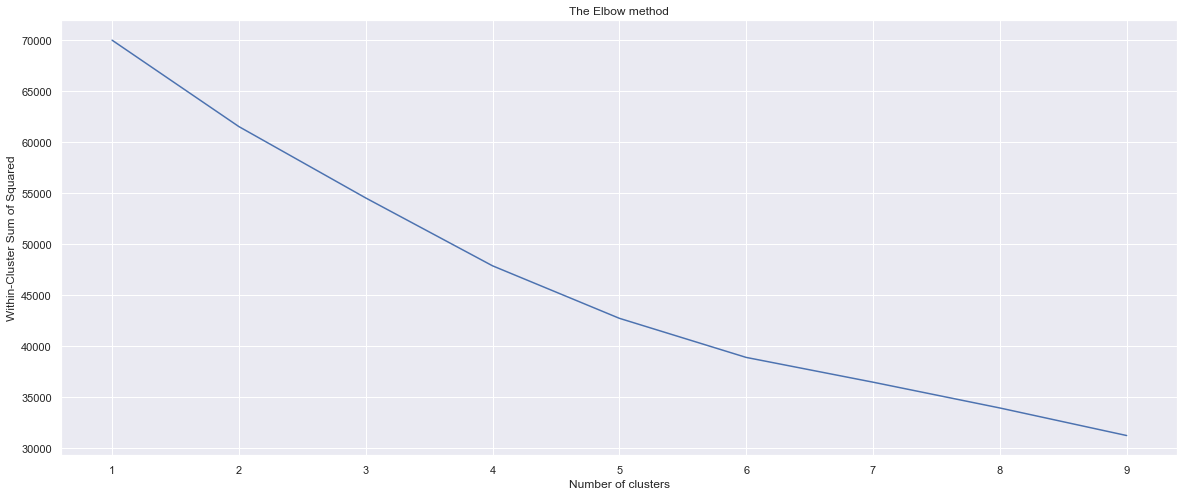

In [386]:
plt.figure(figsize=(20, 8))
plt.plot(range(1, 10), WCSS)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squared');

### Now let's apply K-Means with (k=5)

In [381]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=6,
                         random_state=0,
                         batch_size=1000, 
                         verbose=1)

df['Clusters'] = kmeans.fit_predict(df_k)

Init 1/3 with method: k-means++
Inertia for init 1/3: 188686888.871614
Init 2/3 with method: k-means++
Inertia for init 2/3: 256112760.876603
Init 3/3 with method: k-means++
Inertia for init 3/3: 266467658.025528
Minibatch iteration 1/1000: mean batch inertia: 73465.017209, ewa inertia: 73465.017209 
Minibatch iteration 2/1000: mean batch inertia: 36159.922247, ewa inertia: 66000.265841 
Minibatch iteration 3/1000: mean batch inertia: 95586.160114, ewa inertia: 71920.404765 
Minibatch iteration 4/1000: mean batch inertia: 90405.969499, ewa inertia: 75619.367193 
Minibatch iteration 5/1000: mean batch inertia: 47421.091547, ewa inertia: 69976.890826 
Minibatch iteration 6/1000: mean batch inertia: 91875.786380, ewa inertia: 74358.860921 
Minibatch iteration 7/1000: mean batch inertia: 35766.157882, ewa inertia: 66636.459113 
Minibatch iteration 8/1000: mean batch inertia: 48649.335211, ewa inertia: 63037.234720 
Minibatch iteration 9/1000: mean batch inertia: 26685.201961, ewa inertia: 

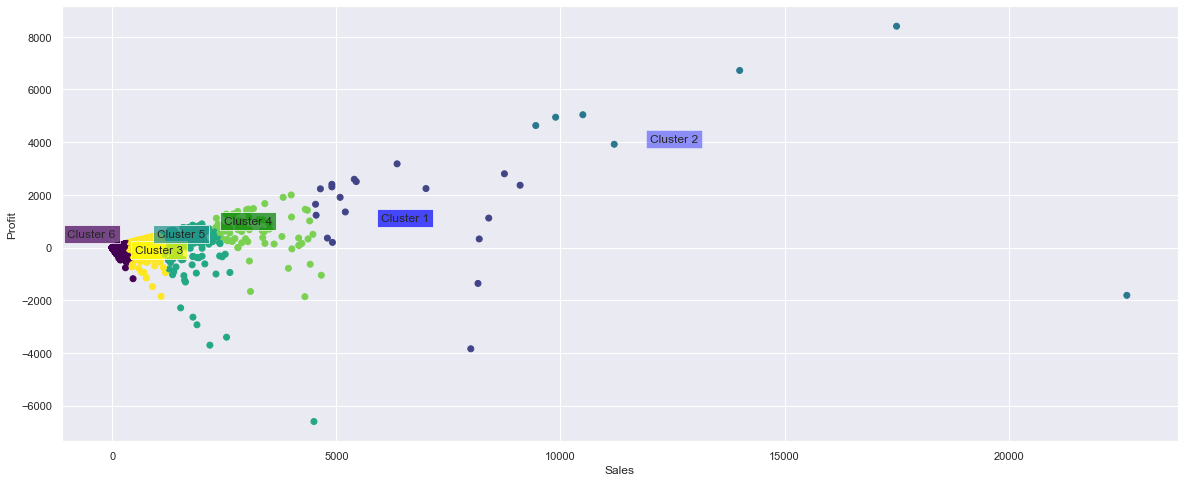

In [368]:
plt.figure(figsize=(20, 8))
plt.scatter(df['Sales'], df['Profit'], c=df['Clusters'], cmap='viridis');
plt.xlabel('Sales')
plt.ylabel('Profit')

plt.text(6000, 1000, 'Cluster 1', bbox=dict(facecolor='blue', alpha=0.7))
plt.text(12000, 4000, 'Cluster 2', bbox=dict(facecolor='blue', alpha=0.4))
plt.text(500, -200, 'Cluster 3', bbox=dict(facecolor='yellow', alpha=0.7))
plt.text(2500, 900, 'Cluster 4', bbox=dict(facecolor='green', alpha=0.7))
plt.text(1000, 400, 'Cluster 5', bbox=dict(facecolor='#22908c', alpha=0.7))
plt.text(-1000, 400, 'Cluster 6', bbox=dict(facecolor='#460058', alpha=0.7));

### 2) Heatmaps and Dendrograms

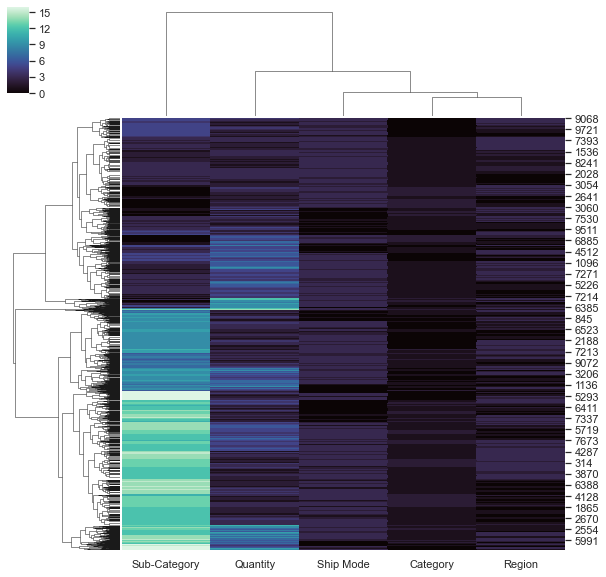

In [395]:
sns.clustermap(df_k[['Ship Mode','Quantity','Sub-Category','Category','Region']], cmap='mako');